**Risk Analysis Chatbot**


In [1]:
# Import Libraries

import pandas as pd
import numpy as np

In [2]:
# Import Dataset

dataset = pd.read_csv(r'https://raw.githubusercontent.com/siiddd/Risk-Analysis-Chatbot/main/dataset.csv')

In [3]:
dataset.shape

(425, 11)

In [4]:
dataset.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


Lets us remove the First Column which has the index.

We can 'Label Encode' the Columns: 

1. Countries 
2. Local 
3. Industry Sector 
4. Accident Level 
5. Potential Level 
6. Gender 
7. Employee or Third Party

In [5]:
dataset = dataset.iloc[:, 1:]
dataset

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,7/4/2017 0:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,7/4/2017 0:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,7/5/2017 0:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,7/6/2017 0:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset['Countries'] = label_encoder.fit_transform(dataset['Countries'])
dataset['Local'] = label_encoder.fit_transform(dataset['Local'])
dataset['Industry Sector'] = label_encoder.fit_transform(dataset['Industry Sector'])
dataset['Accident Level'] = label_encoder.fit_transform(dataset['Accident Level'])
dataset['Potential Accident Level'] = label_encoder.fit_transform(dataset['Potential Accident Level']) 
dataset['Genre'] = label_encoder.fit_transform(dataset['Genre'])
dataset['Employee or Third Party'] = label_encoder.fit_transform(dataset['Employee or Third Party'])
dataset

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,1/1/2016 0:00,0,0,1,0,3,1,1,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1/2/2016 0:00,1,1,1,0,3,1,0,Pressurized Systems,During the activation of a sodium sulphide pum...
2,1/6/2016 0:00,0,2,1,0,2,1,2,Manual Tools,In the sub-station MILPO located at level +170...
3,1/8/2016 0:00,0,3,1,0,0,1,1,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,1/10/2016 0:00,0,3,1,3,3,1,1,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,7/4/2017 0:00,0,3,1,0,2,1,1,Others,"Being approximately 5:00 a.m. approximately, w..."
421,7/4/2017 0:00,0,2,1,0,1,0,0,Others,The collaborator moved from the infrastructure...
422,7/5/2017 0:00,1,8,0,0,1,1,0,Venomous Animals,During the environmental monitoring activity i...
423,7/6/2017 0:00,1,4,0,0,1,1,0,Cut,The Employee performed the activity of strippi...


In [7]:
dataset['Countries'].value_counts(sort = True)

0    251
1    130
2     44
Name: Countries, dtype: int64

In [8]:
dataset['Local'].value_counts()

2     90
4     59
0     57
3     56
5     46
9     44
7     27
1     24
6     14
11     4
8      2
10     2
Name: Local, dtype: int64

In [9]:
dataset['Industry Sector'].value_counts(sort = True)

1    241
0    134
2     50
Name: Industry Sector, dtype: int64

In [10]:
dataset['Accident Level'].value_counts(sort = True)

0    316
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [11]:
dataset['Potential Accident Level'].value_counts(sort = True)

3    143
2    106
1     95
0     49
4     31
5      1
Name: Potential Accident Level, dtype: int64

In [12]:
dataset['Genre'].value_counts(sort = True)

1    403
0     22
Name: Genre, dtype: int64

In [13]:
dataset['Employee or Third Party'].value_counts(sort = True)

1    189
0    179
2     57
Name: Employee or Third Party, dtype: int64

In [14]:
# Check for Missing Values

dataset.isna().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [15]:
# Removing the Date Column

dataset = dataset.iloc[:, 1:]

In [17]:
# Rename Genre to Gender

dataset.rename(columns = {'Genre' : 'Gender'}, inplace = True)
dataset

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,0,0,1,0,3,1,1,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,1,1,0,3,1,0,Pressurized Systems,During the activation of a sodium sulphide pum...
2,0,2,1,0,2,1,2,Manual Tools,In the sub-station MILPO located at level +170...
3,0,3,1,0,0,1,1,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,0,3,1,3,3,1,1,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...
420,0,3,1,0,2,1,1,Others,"Being approximately 5:00 a.m. approximately, w..."
421,0,2,1,0,1,0,0,Others,The collaborator moved from the infrastructure...
422,1,8,0,0,1,1,0,Venomous Animals,During the environmental monitoring activity i...
423,1,4,0,0,1,1,0,Cut,The Employee performed the activity of strippi...


In [18]:
# Creating a Feature out of 'Accident Level' and 'Potential Accident Level' by combining them

dataset['Custom Accident Level'] = dataset['Accident Level'] + dataset['Potential Accident Level']
dataset = dataset.iloc[:, [0,1,2,5,6,7,8,9]]
dataset

,Countries,Local,Industry Sector,Gender,Employee or Third Party,Critical Risk,Description,Custom Accident Level
0,0,0,1,1,1,Pressed,While removing the drill rod of the Jumbo 08 f...,3
1,1,1,1,1,0,Pressurized Systems,During the activation of a sodium sulphide pum...,3
2,0,2,1,1,2,Manual Tools,In the sub-station MILPO located at level +170...,2
3,0,3,1,1,1,Others,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,0,3,1,1,1,Others,Approximately at 11:45 a.m. in circumstances t...,6
...,...,...,...,...,...,...,...,...
420,0,3,1,1,1,Others,"Being approximately 5:00 a.m. approximately, w...",2
421,0,2,1,0,0,Others,The collaborator moved from the infrastructure...,1
422,1,8,0,1,0,Venomous Animals,During the environmental monitoring activity i...,1
423,1,4,0,1,0,Cut,The Employee performed the activity of strippi...,1


In [19]:
# Target Variable is 'Custom Accident Level'

dataset_y = dataset['Custom Accident Level']
dataset_y.value_counts(sort = True)

2    96
3    94
1    88
0    49
5    29
4    29
6    23
7     9
8     7
9     1
Name: Custom Accident Level, dtype: int64

In [20]:
# Independant Variables separation

dataset_x = dataset.iloc[:, :-1]
dataset_x

,Countries,Local,Industry Sector,Gender,Employee or Third Party,Critical Risk,Description
0,0,0,1,1,1,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,1,1,1,0,Pressurized Systems,During the activation of a sodium sulphide pum...
2,0,2,1,1,2,Manual Tools,In the sub-station MILPO located at level +170...
3,0,3,1,1,1,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,0,3,1,1,1,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...
420,0,3,1,1,1,Others,"Being approximately 5:00 a.m. approximately, w..."
421,0,2,1,0,0,Others,The collaborator moved from the infrastructure...
422,1,8,0,1,0,Venomous Animals,During the environmental monitoring activity i...
423,1,4,0,1,0,Cut,The Employee performed the activity of strippi...


In [21]:
# Split the data into Test and Train

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(dataset_x, pd.DataFrame(dataset_y), train_size = 0.90, random_state = 12)
print(x_train.shape, y_train.shape)

(382, 7) (382, 1)


**Pre-process the 'Description' feature from the 'Train' dataset**

In [22]:
description = x_train['Description']
description

201    During the execution of the area cleaning acti...
410    Being 9:40 a.m. The driver of the AEQ-819 plat...
263    During the activity of chuteo of ore in hopper...
395    At 04:00 h on 05/19/17, the mechanic on duty o...
186    When removing the cap from the wear plate of t...
                             ...                        
241    As the employee cleaned the thermal recovery b...
253    The workers: César (injured) and Nilton receiv...
390    The maid was handling a pipette for sample pre...
155    The operator of the Scissor 187 leaves his equ...
331    the moment of extracting the bolts of the CHUC...
Name: Description, Length: 382, dtype: object

In [23]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [24]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [29]:
import re

for i in range(len(description)):
   description[description.index[i]] = re.sub('[^a-zA-Z]',' ', description[description.index[i]]).lower()
   description[description.index[i]] = re.sub('\s+', ' ', description[description.index[i]])
   description[description.index[i]] = nltk.word_tokenize(description[description.index[i]])
   description[description.index[i]] = [WordNetLemmatizer().lemmatize(word) for word in description[description.index[i]] if word not in stopwords.words('english')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

In [30]:
description

201    [execution, area, cleaning, activity, using, h...
410    [driver, aeq, plate, dump, truck, ton, heading...
263    [activity, chuteo, ore, hopper, op, operator, ...
395    [h, mechanic, duty, section, antonio, observed...
186    [removing, cap, wear, plate, warman, lx, bb, p...
                             ...                        
241    [employee, cleaned, thermal, recovery, boiler,...
253    [worker, c, sar, injured, nilton, receive, ord...
390    [maid, handling, pipette, sample, preparation,...
155    [operator, scissor, leaf, equipment, parked, l...
331    [moment, extracting, bolt, chuck, rotation, un...
Name: Description, Length: 382, dtype: object

In [48]:
!pip install nlpaug
!pip install transformers

import nlpaug.augmenter.word as naw

     |████████████████████████████████| 3.5 MB 4.2 MB/s 
     |████████████████████████████████| 6.8 MB 34.4 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 596 kB 48.2 MB/s 
     |████████████████████████████████| 895 kB 55.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


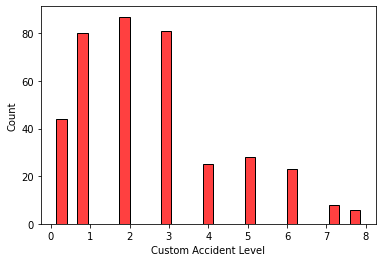

In [49]:
sns.histplot(y_train['Custom Accident Level'], shrink  = 0.5, color = 'red')

**From the above plot it is obvious that there is a 'Heavy Imbalance' in the dataset**

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

for i in range(len(description)):
   description[description.index[i]] = TreebankWordDetokenizer().detokenize([description[description.index[i]]])


In [54]:
aug = naw.ContextualWordEmbsAug()
augmented_text = aug.augment(description[description.index[4]], n=3)
augmented_text

['x',
 '।',
 'with',
 '।',
 '।',
 '。',
 '。',
 'e',
 '...',
 'i',
 'p',
 'e',
 'b',
 'let',
 '॥',
 'and',
 'p',
 'let']

In [55]:
description[description.index[8]]

['mr',
 'eriks',
 'completed',
 'change',
 'guide',
 'pole',
 'conveyor',
 'belt',
 'collaborator',
 'moved',
 'side',
 'belt',
 'remove',
 'tecl',
 'pass',
 'stair',
 'without',
 'getting',
 'observe',
 'moment',
 'collaborator',
 'jhon',
 'dropped',
 'inchancable',
 'weight',
 'approx',
 'kg',
 'entrance',
 'platform',
 'chute',
 'discharge',
 'height',
 'meter',
 'iron',
 'grazed',
 'forearm',
 'finally',
 'hitting',
 'left',
 'foot',
 'height',
 'instep']